In [12]:
##TTF & hedging 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Récupérons les données du Gaz TTF
import yfinance as yf
import mplfinance as mpf

ttf='TTF=F'
data=yf.Ticker(ttf)
TTF=data.history(period='1d',start='2019-1-1', end='2024-5-20')

In [14]:
TTF.dtypes, TTF.head()

(Open            float64
 High            float64
 Low             float64
 Close           float64
 Volume            int64
 Dividends       float64
 Stock Splits    float64
 dtype: object,
                                 Open       High        Low      Close  Volume  \
 Date                                                                            
 2019-01-02 00:00:00-05:00  22.280001  22.549999  22.145000  22.475000      20   
 2019-01-03 00:00:00-05:00  22.215000  22.254999  22.115000  22.254999      10   
 2019-01-04 00:00:00-05:00  22.844999  22.955000  22.809999  22.930000      40   
 2019-01-07 00:00:00-05:00  21.910000  21.910000  21.469999  21.530001      35   
 2019-01-08 00:00:00-05:00  22.165001  22.165001  22.090000  22.090000      10   
 
                            Dividends  Stock Splits  
 Date                                                
 2019-01-02 00:00:00-05:00        0.0           0.0  
 2019-01-03 00:00:00-05:00        0.0           0.0  
 2019-01-04 00:00

C:\Users\adamh\miniconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


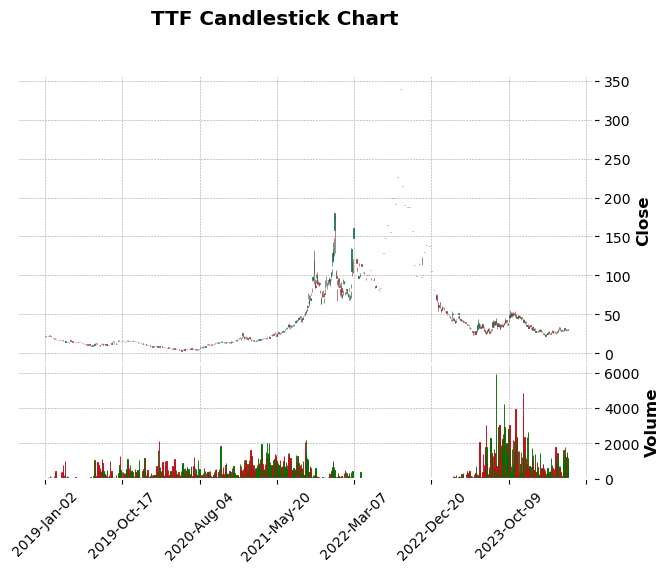

In [15]:
mpf.plot(TTF, type='candle', style='charles', title=f'TTF Candlestick Chart', ylabel='Close', volume=True)

In [16]:
## Pour l'exercice, placons nous juste en amont de la crise energetique
TTF_test = TTF.loc['2019-01-01':'2019-12-30']

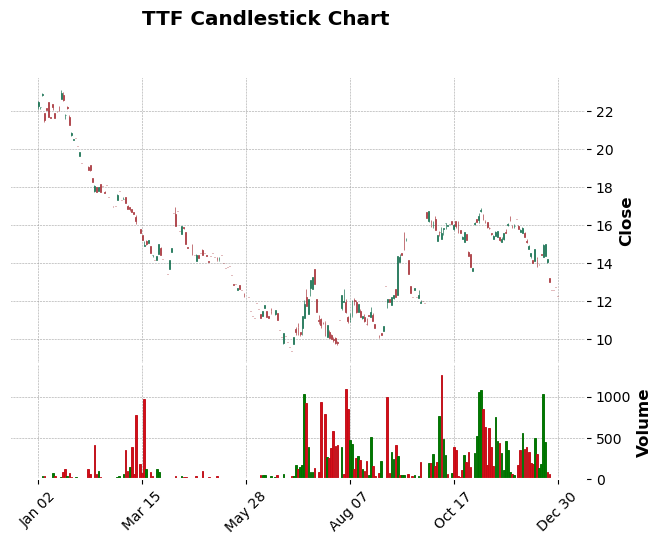

In [17]:
mpf.plot(TTF_test, type='candle', style='charles', title=f'TTF Candlestick Chart', ylabel='Close', volume=True)

In [18]:
TTF_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-02 00:00:00-05:00 to 2019-12-30 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.7 KB


In [19]:
## Récupérons les données de consommation du gaz en France via GRDF
GRDF=pd.read_csv("GRDF.csv")
GRDF.head()


,Numéro de semaine,Date début de semaine,Date fin de semaine,Volume PEC - Période 2018/2019,Volume PEC - Période 2022/2023,Volume Industriel - Période 2018/2019,Volume Industriel - Période 2022/2023,Volume DP - Brute - Période 2018/2019,Volume DP - Brute - Période 2022/2023,Volume DP - Corrigé du climat - Période 2018/2019,Volume DP - Corrigé du climat - Période 2022/2023,Volume Total - Brute - Période 2018/2019,Volume Total - Brute - Période 2022/2023,Volume Total - Corrigé du climat - Période 2018/2019,Volume Total - Corrigé du climat - Période 2022/2023,Volume Consommation Finale - Brute - Période 2018/2019,Volume Consommation Finale - Brute - Période 2022/2023,Volume Consommation Finale - Corrigé du climat - Période 2018/2019,Volume Consommation Finale - Corrigé du climat - Période 2022/2023,Année
0,35,",,,,,,,,,,,,,,,",2022-09-04,0.80,1.30,2.35,1.82,1.76,1.57,1.75,1.69,4.91,4.69,4.90,4.81,4.11,3.39,4.09,3.51,2022
1,38,2022-09-19,2022-09-25,0.40,1.15,2.62,2.12,2.16,2.27,2.12,1.70,5.18,5.54,5.14,4.97,4.77,4.39,4.74,3.81,2022
2,40,2022-10-03,2022-10-09,0.87,1.22,2.66,2.09,3.16,2.79,3.30,2.67,6.69,6.11,6.83,5.99,5.82,4.88,5.96,4.76,2022
3,7,2023-02-13,2023-02-19,1.27,1.23,3.20,2.53,9.40,7.58,10.86,9.19,13.87,11.34,15.33,12.95,12.60,10.11,14.07,11.72,2023
4,21,2023-05-22,2023-05-28,0.65,0.32,2.39,1.69,2.56,2.01,2.49,2.05,5.61,4.02,5.53,4.06,4.95,3.70,4.88,3.74,2023


In [20]:
#Pour l'execrcie, on va supposer connaitre la consommation du gaz 2018-2019, 
GRDF_test=GRDF[['Numéro de semaine','Date début de semaine','Date fin de semaine','Volume Total - Brute - Période 2018/2019']]

In [21]:
GRDF_test.head()

,Numéro de semaine,Date début de semaine,Date fin de semaine,Volume Total - Brute - Période 2018/2019
0,35,",,,,,,,,,,,,,,,",2022-09-04,4.91
1,38,2022-09-19,2022-09-25,5.18
2,40,2022-10-03,2022-10-09,6.69
3,7,2023-02-13,2023-02-19,13.87
4,21,2023-05-22,2023-05-28,5.61


In [22]:
GRDF_test.loc[0,"Date début de semaine"]='2022-08-15'
GRDF_test.head()

,Numéro de semaine,Date début de semaine,Date fin de semaine,Volume Total - Brute - Période 2018/2019
0,35,2022-08-15,2022-09-04,4.91
1,38,2022-09-19,2022-09-25,5.18
2,40,2022-10-03,2022-10-09,6.69
3,7,2023-02-13,2023-02-19,13.87
4,21,2023-05-22,2023-05-28,5.61


In [23]:
GRDF_test.dtypes
GRDF_test['Date début de semaine'] = pd.to_datetime(GRDF_test['Date début de semaine'])
GRDF_test['Date fin de semaine'] = pd.to_datetime(GRDF_test['Date fin de semaine'])

GRDF_test['Date début de semaine'] = GRDF_test['Date début de semaine'].apply(lambda x: x.replace(year=2018) if x.year == 2022 else x)
GRDF_test['Date début de semaine'] = GRDF_test['Date début de semaine'].apply(lambda x: x.replace(year=2019) if x.year == 2023 else x)

GRDF_test['Date fin de semaine'] = GRDF_test['Date fin de semaine'].apply(lambda x: x.replace(year=2019) if x.year == 2023 else x)
GRDF_test['Date fin de semaine'] = GRDF_test['Date fin de semaine'].apply(lambda x: x.replace(year=2018) if x.year == 2022 else x)
GRDF_test.head()

C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\2187738205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GRDF_test['Date début de semaine'] = pd.to_datetime(GRDF_test['Date début de semaine'])
C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\2187738205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GRDF_test['Date fin de semaine'] = pd.to_datetime(GRDF_test['Date fin de semaine'])
C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\2187738205.py:5: SettingWithCopyWarning: 
A value is trying to b

,Numéro de semaine,Date début de semaine,Date fin de semaine,Volume Total - Brute - Période 2018/2019
0,35,2018-08-15,2018-09-04,4.91
1,38,2018-09-19,2018-09-25,5.18
2,40,2018-10-03,2018-10-09,6.69
3,7,2019-02-13,2019-02-19,13.87
4,21,2019-05-22,2019-05-28,5.61


In [24]:
#Le DataFrame est en semaines, on va plutôt le mettre en jour
GRDF_test['Date début de semaine'] = pd.to_datetime(GRDF_test['Date début de semaine'])
GRDF_test['Date fin de semaine'] = pd.to_datetime(GRDF_test['Date fin de semaine'])

# Liste pour stocker tous les jours entre "Date début de semaine" et "Date fin de semaine"
all_days = []
all_volumes = []

# Parcourir chaque ligne du DataFrame
for index, row in GRDF_test.iterrows():
    # Générer tous les jours entre "Date début de semaine" et "Date fin de semaine" pour cette ligne
    days_between = pd.date_range(start=row['Date début de semaine'], end=row['Date fin de semaine'])
    # Répéter le volume total sur la période par 21 pour chaque jour
    volume_per_day = row['Volume Total - Brute - Période 2018/2019'] / 21
    # Créer une liste avec le volume répété pour chaque jour
    volumes = [volume_per_day] * len(days_between)
    # Étendre la liste des jours
    all_days.extend(days_between)
    # Étendre la liste des volumes correspondants
    all_volumes.extend(volumes)

# Créer un nouveau DataFrame avec toutes les dates et les volumes correspondants
conso = pd.DataFrame({'jour': all_days, 'Volume': all_volumes})

C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\2113264991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GRDF_test['Date début de semaine'] = pd.to_datetime(GRDF_test['Date début de semaine'])
C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\2113264991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GRDF_test['Date fin de semaine'] = pd.to_datetime(GRDF_test['Date fin de semaine'])


In [25]:
conso

,jour,Volume
0,2018-08-15,0.233810
1,2018-08-16,0.233810
2,2018-08-17,0.233810
3,2018-08-18,0.233810
4,2018-08-19,0.233810
...,...,...
374,2019-03-29,0.451429
375,2019-03-30,0.451429
376,2019-03-31,0.451429
377,2019-04-01,0.451429


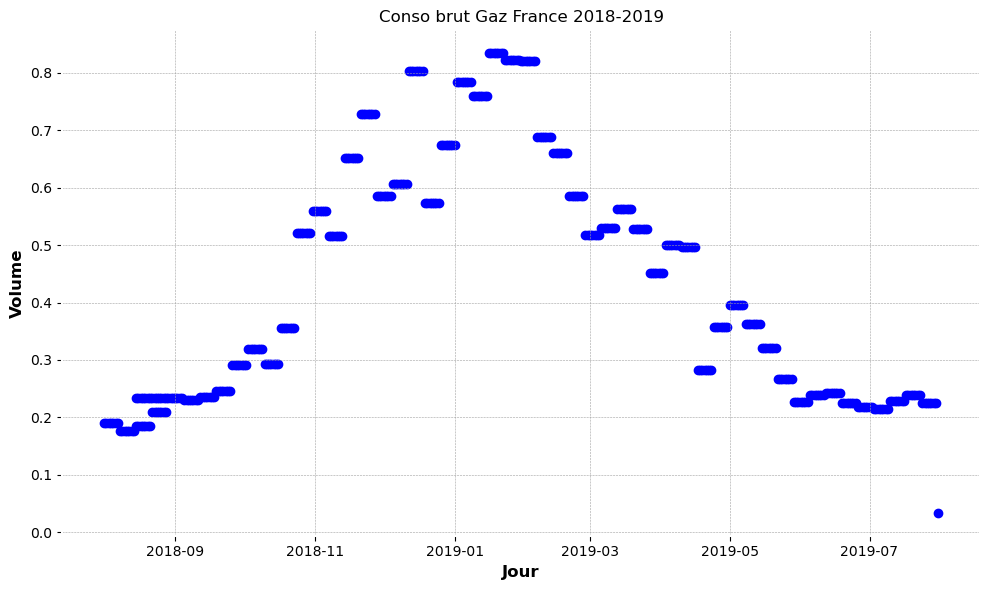

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(conso['jour'], conso['Volume'], color='blue', alpha=1)  # Nuage de points
plt.title('Conso brut Gaz France 2018-2019')
plt.xlabel('Jour')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()

In [27]:
#Pour les achats de gaz, on va faire plusieurs méthodes
## supporser qu'on achète au jour le jour, puis qu'on achète une année en avance.
##Achat au jour le jour
TTF_test.head(), TTF_test.tail()

(                                Open       High        Low      Close  Volume  \
 Date                                                                            
 2019-01-02 00:00:00-05:00  22.280001  22.549999  22.145000  22.475000      20   
 2019-01-03 00:00:00-05:00  22.215000  22.254999  22.115000  22.254999      10   
 2019-01-04 00:00:00-05:00  22.844999  22.955000  22.809999  22.930000      40   
 2019-01-07 00:00:00-05:00  21.910000  21.910000  21.469999  21.530001      35   
 2019-01-08 00:00:00-05:00  22.165001  22.165001  22.090000  22.090000      10   
 
                            Dividends  Stock Splits  
 Date                                                
 2019-01-02 00:00:00-05:00        0.0           0.0  
 2019-01-03 00:00:00-05:00        0.0           0.0  
 2019-01-04 00:00:00-05:00        0.0           0.0  
 2019-01-07 00:00:00-05:00        0.0           0.0  
 2019-01-08 00:00:00-05:00        0.0           0.0  ,
                              Open    High   

In [28]:
#On ajoute les colonnes nécessaires au DF conso
conso['année'] = conso['jour'].dt.year
conso['mois_jour'] = conso['jour'].dt.strftime('%m-%d')

In [29]:
conso.head()

,jour,Volume,année,mois_jour
0,2018-08-15,0.23381,2018,08-15
1,2018-08-16,0.23381,2018,08-16
2,2018-08-17,0.23381,2018,08-17
3,2018-08-18,0.23381,2018,08-18
4,2018-08-19,0.23381,2018,08-19


In [30]:
dates_2019 = pd.date_range(start='2019-01-01', end='2019-12-17')

# Filtrer pour garder seulement les jours de semaine (lundi à vendredi)
dates_2019 = dates_2019[dates_2019.weekday < 5]


In [31]:
TTF_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-02 00:00:00-05:00 to 2019-12-30 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.7 KB


In [32]:
TTF_test['jour']=dates_2019.strftime('%m-%d')

C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\1127322382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTF_test['jour']=dates_2019.strftime('%m-%d')


In [33]:
TTF_test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,jour
Date,,,,,,,,
2019-01-02 00:00:00-05:00,22.280001,22.549999,22.145000,22.475000,20,0.0,0.0,01-01
2019-01-03 00:00:00-05:00,22.215000,22.254999,22.115000,22.254999,10,0.0,0.0,01-02
2019-01-04 00:00:00-05:00,22.844999,22.955000,22.809999,22.930000,40,0.0,0.0,01-03
2019-01-07 00:00:00-05:00,21.910000,21.910000,21.469999,21.530001,35,0.0,0.0,01-04
2019-01-08 00:00:00-05:00,22.165001,22.165001,22.090000,22.090000,10,0.0,0.0,01-07
...,...,...,...,...,...,...,...,...
2019-12-23 00:00:00-05:00,13.210000,13.210000,13.025000,13.025000,60,0.0,0.0,12-11
2019-12-24 00:00:00-05:00,12.610000,12.610000,12.605000,12.605000,15,0.0,0.0,12-12
2019-12-26 00:00:00-05:00,12.605000,12.605000,12.605000,12.605000,0,0.0,0.0,12-13


In [34]:
conso

,jour,Volume,année,mois_jour
0,2018-08-15,0.233810,2018,08-15
1,2018-08-16,0.233810,2018,08-16
2,2018-08-17,0.233810,2018,08-17
3,2018-08-18,0.233810,2018,08-18
4,2018-08-19,0.233810,2018,08-19
...,...,...,...,...
374,2019-03-29,0.451429,2019,03-29
375,2019-03-30,0.451429,2019,03-30
376,2019-03-31,0.451429,2019,03-31
377,2019-04-01,0.451429,2019,04-01


In [35]:
# Dans conso, le volume correspond à un TWH c'est donc 1 000 000 * un volume de TTF
C=0 # C est le cout du gaz acheté au jour le jour, divisé par 1 000 000 suivant remarque ci-dessus
for i in range(0,len(conso['mois_jour'])):
    i=374
    search_date=conso['mois_jour'][i]
    c = conso.loc[conso['mois_jour'] == search_date, 'Volume'].iloc[0]
    d=TTF_test.loc[TTF_test['jour'] == search_date, 'Close'].iloc[0]
    C=c*d+C

In [36]:
c,d,C

(0.45142857142857146, 14.1899995803833, 2427.7872996357664)

In [37]:
##Admettons que l'on ait acheté tout le volume nécessaire en début d'année
search_date=TTF_test['jour'][0]
C1=conso['Volume'].sum()*TTF_test.loc[TTF_test['jour'] == search_date, 'Close'].iloc[0]
C1

C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\1772979610.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  search_date=TTF_test['jour'][0]


3657.8919311332706

In [38]:
##Dans le cas ci-dessus, preferable d'acheter au jour 
#Surtout que le cout du stockage a été négligé

In [39]:
#HEDGING

In [40]:
##Admettons que l'on ait en début d'année signer un Futur qui nous oblige à acheter au prix suivant:
def calculate_futures_price(S, r, b, T):
    """
    Calcule le prix d'un contrat à terme (futur) selon la formule simplifiée.

    Args:
    S: Prix actuel du sous-jacent.
    r: Taux d'intérêt sans risque.
    b: Coût de portage (le cas échéant).
    T: Durée du contrat à terme en années.

    Returns:
    F: Prix du contrat à terme (futur).
    """
    F = S * np.exp((r - b) * T)
    return F

# Dans notre cas
S = TTF_test['Close'][0]   # Prix actuel du sous-jacent
r = 0.01  # Une OAT devait avoir un rendement de 1% en 2020
b = 0.0   # Coût de portage (hypothétique)
T = 1     # Durée du contrat en années

futures_price = calculate_futures_price(S, r, b, T)
print(f"Le prix du contrat à terme (futur) est : {futures_price:.2f}")
print(f"Le gain est de  : {C1-futures_price*conso['Volume'].sum():.2f}")
print(f"Le gain est de  : {C-futures_price*conso['Volume'].sum():.2f}")



Le prix du contrat à terme (futur) est : 22.70
Le gain est de  : -36.76
Le gain est de  : -1266.87


C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\1630251846.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S = TTF_test['Close'][0]   # Prix actuel du sous-jacent


In [41]:
##Admettons que l'on ait acheté un PUT
from scipy.stats import norm

def black_scholes_put(S, K, T, r, sigma):
    """
    Calcule le prix d'une option de vente (put option) selon le modèle de Black-Scholes.

    Args:
    S: Prix actuel du sous-jacent (actif sous-jacent).
    K: Prix d'exercice (strike price) de l'option.
    T: Durée de l'option en années.
    r: Taux d'intérêt sans risque.
    sigma: Volatilité du sous-jacent.

    Returns:
    P: Prix de l'option de vente (put option) selon le modèle de Black-Scholes.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    P = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return P

# Dans notre cas
S = TTF_test['Close'][0]   # Prix actuel du sous-jacent
K = 25   # Prix d'exercice (strike price)
T = 1     # Durée de l'option en années
r = 0.01  # Taux d'intérêt sans risque
sigma = TTF['Close'].std()*np.sqrt(252)  # Volatilité du sous-jacent

put_price = black_scholes_put(S, K, T, r, sigma)
print(f"Le prix de l'option de vente (put option) est : {put_price:.2f}")

Le prix de l'option de vente (put option) est : 24.75


C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\2873664052.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S = TTF_test['Close'][0]   # Prix actuel du sous-jacent


In [42]:
#On a acheté un put, a-t-on intérêt à l'activer?

In [43]:
TTF_test['Put'] = TTF_test['Close'].apply(lambda x: K - x if x < K else x)

C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\1971982513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTF_test['Put'] = TTF_test['Close'].apply(lambda x: K - x if x < K else x)


In [44]:
TTF_test.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,jour,Put
Date,,,,,,,,,
2019-01-02 00:00:00-05:00,22.280001,22.549999,22.145000,22.475000,20,0.0,0.0,01-01,2.525000
2019-01-03 00:00:00-05:00,22.215000,22.254999,22.115000,22.254999,10,0.0,0.0,01-02,2.745001
2019-01-04 00:00:00-05:00,22.844999,22.955000,22.809999,22.930000,40,0.0,0.0,01-03,2.070000
2019-01-07 00:00:00-05:00,21.910000,21.910000,21.469999,21.530001,35,0.0,0.0,01-04,3.469999
2019-01-08 00:00:00-05:00,22.165001,22.165001,22.090000,22.090000,10,0.0,0.0,01-07,2.910000


In [45]:
C2=0
for i in range (0,len(TTF_test['Put'])):
    C2=TTF_test['Put'][i]-put_price
 
print(f"Le gain est de  : {C2:.2f}")
    
    

Le gain est de  : -12.05


C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\3519256706.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  C2=TTF_test['Put'][i]-put_price


In [46]:
#On a globalement pas eu intérêt à activer le PUT

In [47]:
##On en déduit que l'hedging effectué est non efficiace pour la période donnée et au jour donné

In [48]:
#Dans la suite on va modifier les jours d'achat pour voir quel si hedging serait efficace

In [49]:
TTF_test.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,jour,Put
Date,,,,,,,,,
2019-01-02 00:00:00-05:00,22.280001,22.549999,22.145000,22.475000,20,0.0,0.0,01-01,2.525000
2019-01-03 00:00:00-05:00,22.215000,22.254999,22.115000,22.254999,10,0.0,0.0,01-02,2.745001
2019-01-04 00:00:00-05:00,22.844999,22.955000,22.809999,22.930000,40,0.0,0.0,01-03,2.070000
2019-01-07 00:00:00-05:00,21.910000,21.910000,21.469999,21.530001,35,0.0,0.0,01-04,3.469999
2019-01-08 00:00:00-05:00,22.165001,22.165001,22.090000,22.090000,10,0.0,0.0,01-07,2.910000


In [50]:
TTF_test['Open']

Date
2019-01-02 00:00:00-05:00    22.280001
2019-01-03 00:00:00-05:00    22.215000
2019-01-04 00:00:00-05:00    22.844999
2019-01-07 00:00:00-05:00    21.910000
2019-01-08 00:00:00-05:00    22.165001
                               ...    
2019-12-23 00:00:00-05:00    13.210000
2019-12-24 00:00:00-05:00    12.610000
2019-12-26 00:00:00-05:00    12.605000
2019-12-27 00:00:00-05:00    12.765000
2019-12-30 00:00:00-05:00    12.295000
Name: Open, Length: 251, dtype: float64

In [51]:
TTF_test['jour'].dtype

dtype('O')

In [52]:
TTF_test['jour'][0]

C:\Users\adamh\AppData\Local\Temp\ipykernel_11436\1311749530.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TTF_test['jour'][0]


'01-01'

In [53]:
conso.head()

,jour,Volume,année,mois_jour
0,2018-08-15,0.23381,2018,08-15
1,2018-08-16,0.23381,2018,08-16
2,2018-08-17,0.23381,2018,08-17
3,2018-08-18,0.23381,2018,08-18
4,2018-08-19,0.23381,2018,08-19


In [54]:
#def date():
d='01-01'
P=TTF_test[TTF_test['jour']==d]['Close'].iloc[0]
V=conso[conso["mois_jour"]==d]['Volume'].iloc[0]
print(P,V,P*V)

22.475000381469727 0.6752380952380952 15.175976448059082


In [55]:
#d_f: jour où est selctionné le futur
def Futur_D(d):
    # Dans notre cas
    S = TTF_test[TTF_test['jour']==d]['Close'].iloc[0]  # Prix actuel du sous-jacent
    r = 0.01  # Une OAT devait avoir un rendement de 1% en 2020
    b = 0.0   # Coût de portage (hypothétique)
    T = 1     # Durée du contrat en années
    f = calculate_futures_price(S, r, b, T) #Prix du contrat futur pour un volume de gaz
    #V=conso[conso["mois_jour"]==d]['Volume'].iloc[0]
    return f, d


In [56]:
Futur_D('01-01')[0]

22.700877890520236

In [57]:
def FUTUR(d):
    f=Futur_D(d)[0]
    F=[] #Prix du gaz consommé au prix du Futur contracté au d
    S=[] #Prix du gaz consommé au prix du jour
    D=[]
    B=0
    commencer=False
    for date in TTF_test['jour']:
        if date>=d:
            commencer=True
            if commencer==True:
                F.append(f*conso[conso["mois_jour"]==date]['Volume'].iloc[0])
                S.append(TTF_test[TTF_test['jour']==date]['Close'].iloc[0]*conso[conso["mois_jour"]==d]['Volume'].iloc[0])
                D.append(date)
                B=B+TTF_test[TTF_test['jour']==date]['Close'].iloc[0]*conso[conso["mois_jour"]==d]['Volume'].iloc[0]-f*conso[conso["mois_jour"]==date]['Volume'].iloc[0]
    return D,F,S,B


Le prix du FUTUR pour être rentable doit être inférieur à  : 149.14


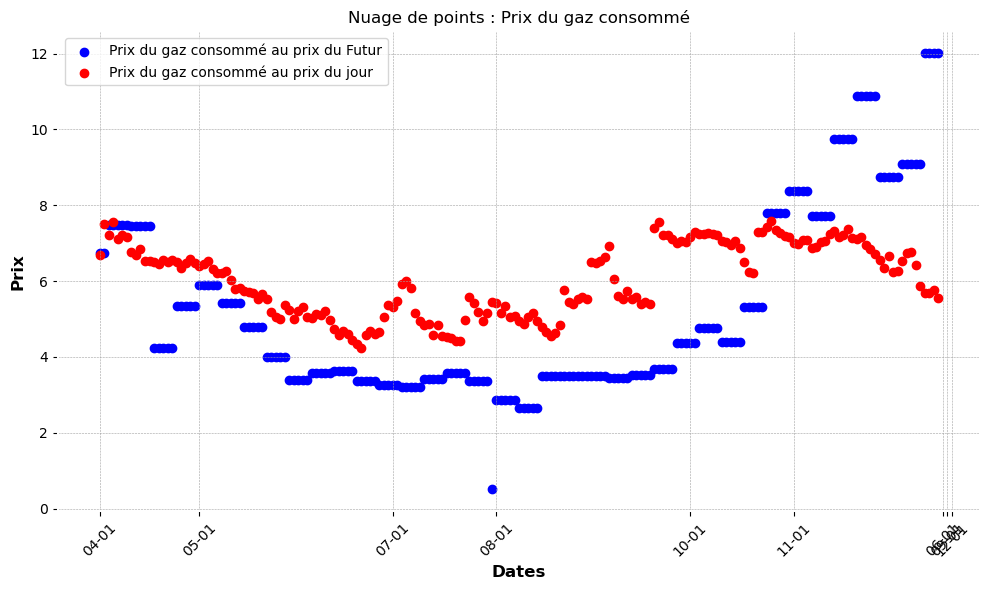

In [58]:
d='04-01'
D=FUTUR(d)[0]
F=FUTUR(d)[1]
S=FUTUR(d)[2]
B=FUTUR(d)[3]
print(f"Le prix du FUTUR pour être rentable doit être inférieur à  : {B:.2f}")

date_debut = d
mois_debut, jour_debut = date_debut.split('-')
dateAffiche=[]
mois = int(mois_debut)
while mois <= 12:
    # Générer la date au format 'MM-DD'
    date_generee = f"{mois:02d}-{jour_debut}"
    dateAffiche.append(date_generee)
    mois += 1

plt.figure(figsize=(10, 6))
plt.scatter(D, F, color='blue', label='Prix du gaz consommé au prix du Futur')
plt.scatter(D, S, color='red', label='Prix du gaz consommé au prix du jour')
plt.title('Nuage de points : Prix du gaz consommé')
plt.xlabel('Dates')
plt.ylabel('Prix')
plt.xticks(dateAffiche,rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [71]:
#Faisons la même chose pour un PUT
##Le prix du put si on le fait au jour d
def PUT(d):
    d='04-01'
    S = TTF_test[TTF_test['jour']==d]['Close'].iloc[0]  # Prix actuel du sous-jacent
    K = S   # On choisit le prix du sois-jacent
    T = 1     # Durée de l'option en années
    r = 0.01  # Taux d'intérêt sans risque
    sigma = TTF['Close'].std()*np.sqrt(252)  # Volatilité du sous-jacent
    ##Pour tous les jours restants on va voir si interet à prendre put ou non et combien peut nous faire gagner de prendre le  put et le comparer au prix d'achat d contrat
    P=[]
    S=[]
    D=[]
    B=0
    i=-1

    for date in TTF_test['jour']:
            if date>=d:
                i=i+1
                if TTF_test[TTF_test['jour']==date]['Close'].iloc[0]<K:
                    P.append(K*conso[conso["mois_jour"]==date]['Volume'].iloc[0])
                else:
                    P.append(TTF_test[TTF_test['jour']==date]['Close'].iloc[0]*conso[conso["mois_jour"]==d]['Volume'].iloc[0])
                S.append(TTF_test[TTF_test['jour']==date]['Close'].iloc[0]*conso[conso["mois_jour"]==d]['Volume'].iloc[0])
                D.append(date)
                B=B+S[i]-P[i]
    r=0.01
    T=i/252
    sigma = TTF['Close'].std()*np.sqrt(i)
    put_price = black_scholes_put(S, K, T, r, sigma)#On bloque le Put au prix calculé à la bonne date
    
    return P,S,D,B,put_price[0]
            
                
                


Le prix du PUT pour être rentable doit être inférieur à  : 141.47
Le prix du PUT a été de  : 14.70


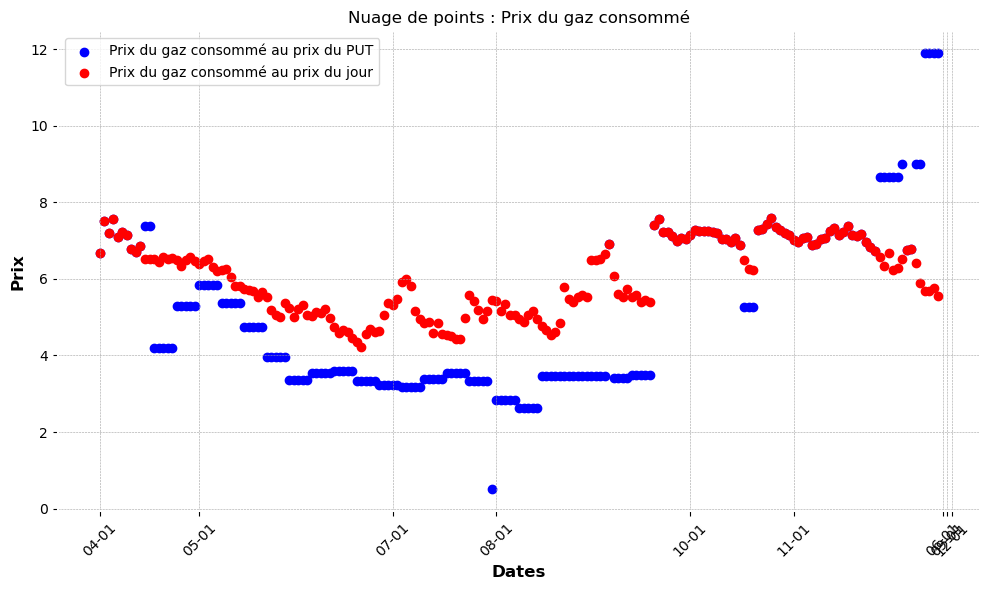

In [74]:
d='04-01'
D=PUT(d)[2]
P=PUT(d)[0]
S=PUT(d)[1]
B=PUT(d)[3]
p=PUT(d)[4]
print(f"Le prix du PUT pour être rentable doit être inférieur à  : {B:.2f}")
print(f"Le prix du PUT a été de  : {p:.2f}")


date_debut = d
mois_debut, jour_debut = date_debut.split('-')
dateAffiche=[]
mois = int(mois_debut)
while mois <= 12:
    # Générer la date au format 'MM-DD'
    date_generee = f"{mois:02d}-{jour_debut}"
    dateAffiche.append(date_generee)
    mois += 1

plt.figure(figsize=(10, 6))
plt.scatter(D, P, color='blue', label='Prix du gaz consommé au prix du PUT')
plt.scatter(D, S, color='red', label='Prix du gaz consommé au prix du jour')
plt.title('Nuage de points : Prix du gaz consommé')
plt.xlabel('Dates')
plt.ylabel('Prix')
plt.xticks(dateAffiche,rotation=45)
plt.legend()
plt.tight_layout()
plt.show()